In [1]:
from keras.layers import Conv2D

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets

In [3]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [4]:
img = misc.ascent()

In [40]:
img.shape

(512, 512)

In [41]:

img_tensor = img.reshape((1, 512, 512, 1))

In [42]:
img_tensor.shape


(1, 512, 512, 1)

In [44]:
from keras.models import Sequential

In [46]:
model=Sequential()

In [48]:
model.add(Conv2D(1, (3,3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [53]:

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 127, 508, 1)

In [54]:
img_pred = img_pred_tensor[0, :, :, 0]

In [56]:
img_pred.shape

(127, 508)

(512, 512)

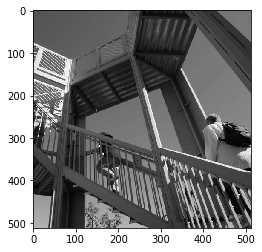

In [61]:
plt.imshow(img, cmap='gray')
img.shape

(127, 508)

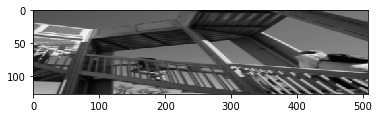

In [62]:
plt.imshow(img_pred,cmap='gray')
img_pred.shape


In [63]:
weights = model.get_weights()

In [69]:
weights[2]

array([[[[-0.5762551 ]],

        [[ 0.30685675]],

        [[-0.57276577]]],


       [[[-0.39104855]],

        [[-0.3326355 ]],

        [[ 0.19652438]]],


       [[[-0.2201998 ]],

        [[-0.20225838]],

        [[ 0.09556437]]]], dtype=float32)

In [72]:
weights[0].shape

(3, 3, 1, 1)

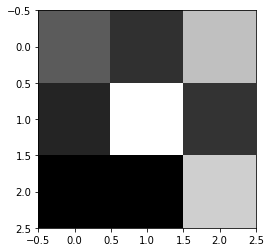

In [73]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [74]:
weights[0] = np.ones(weights[0].shape)

In [75]:
model.set_weights(weights)

In [76]:
img_pred_tensor = model.predict(img_tensor)

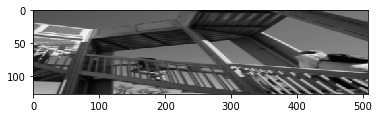

In [77]:
plt.imshow(img_pred, cmap='gray')

In [78]:
model=Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 512, 512, 1)